<a href="https://colab.research.google.com/github/Prakashkumar-mayilsamy/MLOps-Jan2025/blob/main/G24ait030_assign0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose

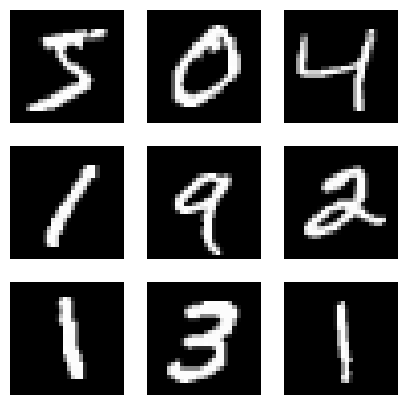

Train images: (60000, 28, 28)
Test images: (10000, 28, 28)


In [5]:
# Load MNIST dataset
(X_train_img, y_train_img), (X_test_img, y_test_img) = mnist.load_data()

# Display some images
plt.figure(figsize=(5, 5))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train_img[i], cmap='gray')
    plt.axis('off')
plt.show()

# Check dataset shape
print("Train images:", X_train_img.shape)
print("Test images:", X_test_img.shape)

In [6]:
# Normalize and reshape the data
X_train_img = X_train_img.reshape(-1, 28*28) / 255.0  # Flatten & scale
X_test_img = X_test_img.reshape(-1, 28*28) / 255.0

In [ ]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Support Vector Machine": SVC(kernel='linear')
}

for name, model in models.items():
    model.fit(X_train_img, y_train_img)
    y_pred = model.predict(X_test_img)
    print(f"{name} Accuracy:", accuracy_score(y_test_img, y_pred))

Random Forest Accuracy: 0.9713


In [ ]:
y_pred_rf = models["Random Forest"].predict(X_test_img)
print("Classification Report:\n", classification_report(y_test_img, y_pred_rf))

sns.heatmap(confusion_matrix(y_test_img, y_pred_rf), annot=True, fmt='d')
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [ ]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df_ts = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

# Display first few rows
print(df_ts.head())

# Plot the time-series data
df_ts.plot(figsize=(10, 5), title="Air Passenger Data")
plt.show()

In [ ]:
# Check for missing values
print(df_ts.isnull().sum())

# Perform seasonal decomposition
decomposition = seasonal_decompose(df_ts, model='multiplicative')
decomposition.plot()
plt.show()

In [ ]:
df_ts['Lag_1'] = df_ts['Passengers'].shift(1)
df_ts['Rolling_Mean'] = df_ts['Passengers'].rolling(window=3).mean()
df_ts.dropna(inplace=True)

In [ ]:
train_size = int(len(df_ts) * 0.8)
train, test = df_ts[:train_size], df_ts[train_size:]

X_train_ts, y_train_ts = train[['Lag_1', 'Rolling_Mean']], train['Passengers']
X_test_ts, y_test_ts = test[['Lag_1', 'Rolling_Mean']], test['Passengers']

In [ ]:
model_ts = RandomForestRegressor(n_estimators=100)
model_ts.fit(X_train_ts, y_train_ts)

y_pred_ts = model_ts.predict(X_test_ts)
print("Mean Absolute Error:", mean_absolute_error(y_test_ts, y_pred_ts))

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(test.index, y_test_ts, label="Actual")
plt.plot(test.index, y_pred_ts, label="Predicted", linestyle="dashed")
plt.legend()
plt.title("Random Forest Time-Series Prediction")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train_img, y_train_img)
print("Best Parameters:", grid_search.best_params_)

In [ ]:
# k-Fold Cross Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(RandomForestClassifier(), X_train_img, y_train_img, cv=skf)
print("Stratified K-Fold Accuracy:", np.mean(scores))

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=0.1)

In [ ]:
X_test_noisy = X_test_img + np.random.normal(0, 0.1, X_test_img.shape)
y_pred_noisy = models["Random Forest"].predict(X_test_noisy)
print("Accuracy on Noisy Data:", accuracy_score(y_test_img, y_pred_noisy))

In [ ]:
!apt-get install wkhtmltopdf
!pip install pdfkit
import pdfkit

with open("report.html", "w") as file:
    file.write("<h1>ML Pipeline Report</h1>")
    file.write("<p>Best Model Accuracy: {:.4f}</p>".format(accuracy_score(y_test_img, y_pred_rf)))

pdfkit.from_file("report.html", "/content/drive/My Drive/ML_Report.pdf")